In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
from tqdm import tqdm_notebook as tqdm
sns.set(style="darkgrid")

In [267]:
# fontsizeの設定
plt.rcParams["font.size"] = 30

# サイズの設定
plt.rcParams['figure.figsize'] = (8, 6)

In [268]:
data = pd.read_csv('../data/car_ads_3.csv', index_col=0)

In [269]:
df = data

In [270]:
df.head(5)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
2282567,ford,fiesta,129000.0,2009.0,NaN,88.0,other,NaN,NaN,man,NaN,NaN,NaN,2016-03-01 04:22:44.466271+00,2016-07-03 17:16:27.50003+00,6900.00
845119,seat,leon,NaN,2004.0,4245.0,NaN,compact,NaN,None,NaN,None,None,gasoline,2015-12-22 06:54:54.986737+00,2016-01-07 10:08:16.993797+00,3886.01
645106,smart,fortwo,99985.0,2004.0,698.0,37.0,NaN,NaN,None,auto,2,2,gasoline,2015-12-12 17:23:52.693186+00,2016-02-10 20:13:12.406986+00,2000.22
2468530,ford,focus,212020.0,2002.0,1753.0,66.0,other,NaN,NaN,man,5,5,NaN,2016-03-04 22:05:51.891484+00,2016-07-03 17:34:54.394008+00,1600.00
3478350,volkswagen,golf,180000.0,2003.0,1900.0,74.0,other,NaN,NaN,man,NaN,NaN,NaN,2017-02-28 18:34:33.090724+00,2017-03-06 01:07:20.215485+00,1295.34


In [271]:
print('---データ数(shape)---')
print(df.shape)
print('\n')

print('---有効データ数(count)---')
print(df.count())
print('\n')

print('---欠損データ数（isnull().sum()---')
print(df.isnull().sum())
print('\n')

print('---欠損値の割合---')
print(df.isnull().sum()/df.shape[0])
print('\n')

print('---データ型(dtypes)---')
print(df.dtypes)
print('\n')

print('---データ情報(info)---')
print(df.info())

---データ数(shape)---
(888228, 16)


---有効データ数(count)---
maker                  758767
model                  604963
mileage                797759
manufacture_year       795878
engine_displacement    702433
engine_power           749571
body_type              608008
color_slug              52624
stk_year               460425
transmission           702799
door_count             734344
seat_count             700943
fuel_type              426005
date_created           888228
date_last_seen         888228
price_eur              888228
dtype: int64


---欠損データ数（isnull().sum()---
maker                  129461
model                  283265
mileage                 90469
manufacture_year        92350
engine_displacement    185795
engine_power           138657
body_type              280220
color_slug             835604
stk_year               427803
transmission           185429
door_count             153884
seat_count             187285
fuel_type              462223
date_created                0
date

## 要約量の確認

In [272]:
df.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,7.977590e+05,795878.000000,702433.000000,749571.000000,8.882280e+05
mean,1.159063e+05,2000.808873,2042.765531,98.448538,3.062208e+06
std,3.446937e+05,82.399243,1961.148841,49.012609,2.871372e+09
min,0.000000e+00,0.000000,0.000000,1.000000,4.000000e-02
25%,1.874200e+04,2004.000000,1400.000000,68.000000,1.295340e+03
50%,8.637600e+04,2009.000000,1798.000000,86.000000,7.327910e+03
75%,1.584085e+05,2013.000000,1997.000000,110.000000,1.628179e+04
max,9.999999e+06,2017.000000,32000.000000,999.000000,2.706149e+12


## データクリーニング

### Typoとか情報がないもの
* bodytypeのotherをnanに
* stk_yearのNoneをnanに
* doorcount, seatcountのNoneをnanに
* 製造年の0をnanに
* 排気量の0をnanに
* 新車（距離0）をnanに（これは必須ではない？）

In [273]:
df['body_type'].replace('None', np.nan, inplace=True)
df['stk_year'].replace('None', np.nan, inplace=True)
df['door_count'].replace('None', np.nan, inplace=True)
df['seat_count'].replace('None', np.nan, inplace=True)
df['manufacture_year'].replace(0, np.nan, inplace=True)
df['engine_displacement'].replace(0, np.nan, inplace=True)
df['mileage'].replace(0, np.nan, inplace=True)

In [274]:
print('---有効データ数(count)---')
print(df.count())
print('\n')

print('---欠損データ数（isnull().sum()---')
print(df.isnull().sum())
print('\n')

print('---欠損値の割合---')
print(df.isnull().sum()/df.shape[0])


---有効データ数(count)---
maker                  758767
model                  604963
mileage                757284
manufacture_year       795849
engine_displacement    702432
engine_power           749571
body_type              608008
color_slug              52624
stk_year               133993
transmission           702799
door_count             615857
seat_count             566726
fuel_type              426005
date_created           888228
date_last_seen         888228
price_eur              888228
dtype: int64


---欠損データ数（isnull().sum()---
maker                  129461
model                  283265
mileage                130944
manufacture_year        92379
engine_displacement    185796
engine_power           138657
body_type              280220
color_slug             835604
stk_year               754235
transmission           185429
door_count             272371
seat_count             321502
fuel_type              462223
date_created                0
date_last_seen              0
price_e

### 外れ値

In [275]:
def outlier_df(df):

    for i in range(len(df.columns)):

        # 列を抽出する
        col = df.iloc[:,i]

        # 四分位数
        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 #四分位範囲

        # 外れ値の基準点
        outlier_min = q1 - (iqr) * 1.5
        outlier_max = q3 + (iqr) * 1.5

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return df


def outlier_se(series):
    # 四分位数
    se = series
    q1 = se.describe()['25%']
    q3 = se.describe()['75%']
    iqr = q3 - q1 #四分位範囲

    # 外れ値の基準点
    outlier_min = q1 - (iqr) * 1.5
    outlier_max = q3 + (iqr) * 1.5

    # 範囲から外れている値を除く
    se[se < outlier_min] = True
    se[se > outlier_max] = True

    return se

#### 1. priceの外れ値

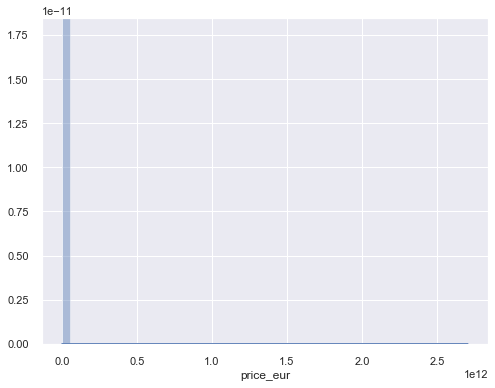

In [277]:
sns.distplot(df['price_eur'])

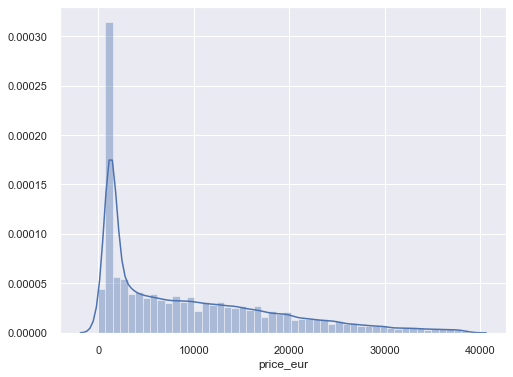

In [284]:
# outlier_se(df['price_eur'])
df = df[df['price_eur'] != True]
sns.distplot(df['price_eur'])

In [285]:
print('---有効データ数(count)---')
print(df.count())
print('\n')

print('---欠損データ数（isnull().sum()---')
print(df.isnull().sum())
print('\n')

print('---欠損値の割合---')
print(df.isnull().sum()/df.shape[0])
df.describe()

---有効データ数(count)---
maker                  727787
model                  588004
mileage                728536
manufacture_year       768394
engine_displacement    673645
engine_power           718008
body_type              587580
color_slug              52342
stk_year               128509
transmission           670552
door_count             586489
seat_count             542113
fuel_type              411879
date_created           854526
date_last_seen         854526
price_eur              854526
dtype: int64


---欠損データ数（isnull().sum()---
maker                  126739
model                  266522
mileage                125990
manufacture_year        86132
engine_displacement    180881
engine_power           136518
body_type              266946
color_slug             802184
stk_year               726017
transmission           183974
door_count             268037
seat_count             312413
fuel_type              442647
date_created                0
date_last_seen              0
price_e

,mileage,manufacture_year,engine_displacement,engine_power
count,7.285360e+05,768394.000000,673645.000000,718008.000000
mean,1.256522e+05,2000.526823,2000.770332,93.666505
std,3.579150e+05,82.813756,1972.402035,40.255472
min,1.000000e+00,1.000000,10.000000,1.000000
25%,2.750000e+04,2004.000000,1398.000000,66.000000
50%,9.750000e+04,2009.000000,1753.000000,85.000000
75%,1.650000e+05,2013.000000,1995.000000,110.000000
max,9.999999e+06,2017.000000,32000.000000,999.000000


#### 2. engine_displacement

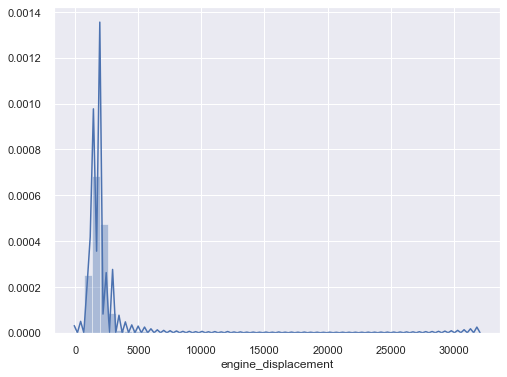

In [167]:
sns.distplot(df['engine_displacement'])

In [286]:
outlier_se(df['engine_displacement'])

/Users/okudashimpeisimac/.pyenv/versions/anaconda3-5.2.0/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2282567     NaN
845119     True
645106      698
2468530    1753
3478350    1900
           ... 
1950514    1461
1280030     NaN
1818013    1997
2482226    True
290990     1995
Name: engine_displacement, Length: 854526, dtype: object

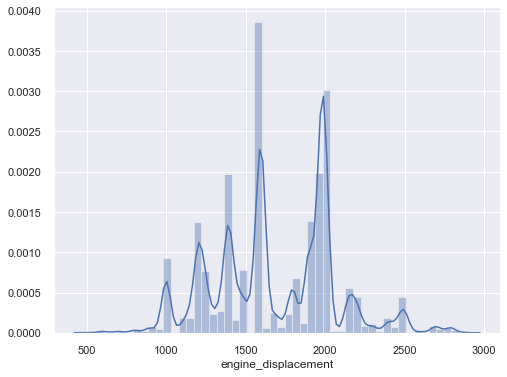

In [287]:
df = df[df['engine_displacement'] != True]
sns.distplot(df['engine_displacement'])

In [169]:
print('---有効データ数(count)---')
print(df.count())
print('\n')

print('---欠損データ数（isnull().sum()---')
print(df.isnull().sum())
print('\n')

print('---欠損値の割合---')
print(df.isnull().sum()/df.shape[0])

---有効データ数(count)---
maker                  533538
model                  446467
mileage                554471
manufacture_year       569528
engine_displacement    616826
engine_power           593538
body_type              424433
color_slug              45956
stk_year               102250
transmission           540036
door_count             507247
seat_count             490183
fuel_type              286199
date_created           616826
date_last_seen         616826
price_eur              616826
dtype: int64


---欠損データ数（isnull().sum()---
maker                   83288
model                  170359
mileage                 62355
manufacture_year        47298
engine_displacement         0
engine_power            23288
body_type              192393
color_slug             570870
stk_year               514576
transmission            76790
door_count             109579
seat_count             126643
fuel_type              330627
date_created                0
date_last_seen              0
price_e

count    616826.000000
mean       1682.996236
std         382.801497
min         504.000000
25%        1395.000000
50%        1600.000000
75%        1975.000000
max        2890.000000
Name: engine_displacement, dtype: float64

#### 3. engine_power

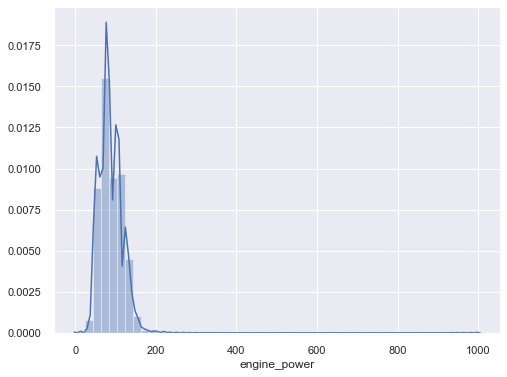

In [171]:
sns.distplot(df['engine_power'])

In [288]:
outlier_se(df['engine_power'])

2282567     88
645106      37
2468530     66
3478350     74
1808645    105
          ... 
2631653     63
1950514     55
1280030    NaN
1818013     90
290990     150
Name: engine_power, Length: 797707, dtype: object

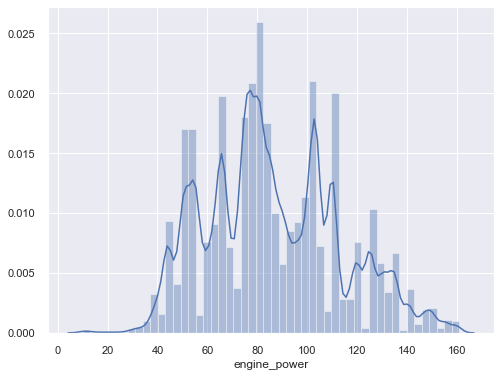

In [289]:
df = df[df['engine_power'] != True]
sns.distplot(df['engine_power'])

In [291]:
print('---有効データ数(count)---')
print(df.count())
print('\n')

print('---欠損データ数（isnull().sum()---')
print(df.isnull().sum())
print('\n')

print('---欠損値の割合---')
print(df.isnull().sum()/df.shape[0])

---有効データ数(count)---
maker                  668353
model                  551131
mileage                671586
manufacture_year       706841
engine_displacement    611449
engine_power           659030
body_type              538345
color_slug              46936
stk_year               117973
transmission           619234
door_count             542523
seat_count             500951
fuel_type              377362
date_created           787206
date_last_seen         787206
price_eur              787206
dtype: int64


---欠損データ数（isnull().sum()---
maker                  118853
model                  236075
mileage                115620
manufacture_year        80365
engine_displacement    175757
engine_power           128176
body_type              248861
color_slug             740270
stk_year               669233
transmission           167972
door_count             244683
seat_count             286255
fuel_type              409844
date_created                0
date_last_seen              0
price_e

#### 4. manufacture_year

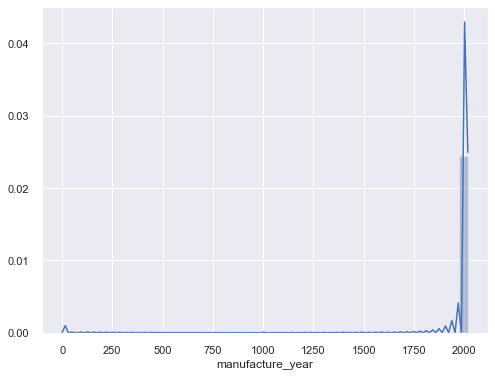

In [292]:
sns.distplot(df['manufacture_year'])

In [293]:
outlier_se(df['manufacture_year'])

2282567    2009
645106     2004
2468530    2002
3478350    2003
1808645    2002
           ... 
2631653    2012
1950514    2011
1280030    2006
1818013    1991
290990     2010
Name: manufacture_year, Length: 787206, dtype: object

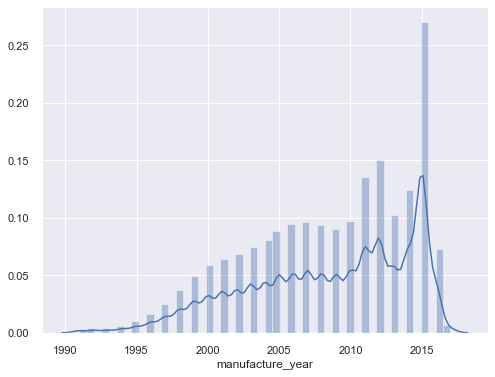

In [294]:
df = df[df['manufacture_year'] != True]
sns.distplot(df['manufacture_year'])

In [295]:
print('---有効データ数(count)---')
print(df.count())
print('\n')

print('---欠損データ数（isnull().sum()---')
print(df.isnull().sum())
print('\n')

print('---欠損値の割合---')
print(df.isnull().sum()/df.shape[0])

---有効データ数(count)---
maker                  656907
model                  542663
mileage                660107
manufacture_year       691414
engine_displacement    603862
engine_power           650322
body_type              525737
color_slug              46677
stk_year               115900
transmission           612532
door_count             539265
seat_count             498387
fuel_type              369787
date_created           771779
date_last_seen         771779
price_eur              771779
dtype: int64


---欠損データ数（isnull().sum()---
maker                  114872
model                  229116
mileage                111672
manufacture_year        80365
engine_displacement    167917
engine_power           121457
body_type              246042
color_slug             725102
stk_year               655879
transmission           159247
door_count             232514
seat_count             273392
fuel_type              401992
date_created                0
date_last_seen              0
price_e

#### 5. mileage

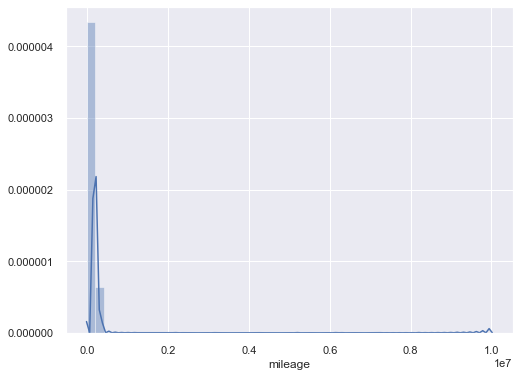

In [296]:
sns.distplot(df['mileage'])

In [298]:
outlier_se(df['mileage'])

/Users/okudashimpeisimac/.pyenv/versions/anaconda3-5.2.0/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2282567    129000
645106      99985
2468530    212020
3478350    180000
1808645    188000
            ...  
2631653     13254
1950514     97000
1280030    168000
1818013    108000
290990      65000
Name: mileage, Length: 764042, dtype: object

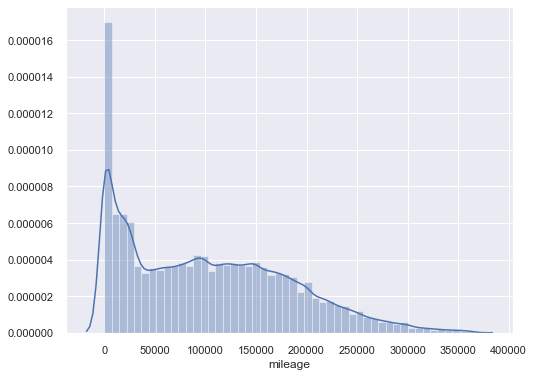

In [299]:
df = df[df['mileage'] != True]
sns.distplot(df['mileage'])

In [301]:
print('---有効データ数(count)---')
print(df.count())
print('\n')

print('---欠損データ数（isnull().sum()---')
print(df.isnull().sum())
print('\n')

print('---欠損値の割合---')
print(df.isnull().sum()/df.shape[0])

---有効データ数(count)---
maker                  645565
model                  533140
mileage                647201
manufacture_year       682423
engine_displacement    593488
engine_power           638879
body_type              515380
color_slug              45955
stk_year               114529
transmission           602347
door_count             530651
seat_count             491905
fuel_type              364894
date_created           758873
date_last_seen         758873
price_eur              758873
dtype: int64


---欠損データ数（isnull().sum()---
maker                  113308
model                  225733
mileage                111672
manufacture_year        76450
engine_displacement    165385
engine_power           119994
body_type              243493
color_slug             712918
stk_year               644344
transmission           156526
door_count             228222
seat_count             266968
fuel_type              393979
date_created                0
date_last_seen              0
price_e

### 情報のない列の削除
* 欠損値が20%以上
    * maker                   0.170620
    * <b>model                   0.468235</b>
    * mileage                 0.113404
    * manufacture_year        0.116035
    * <b>engine_displacement     0.264502</b>
    * engine_power            0.184982
    * <b>body_type               0.460882</b>
    * <b>color_slug             15.878763</b>
    * <b>stk_year                0.929148</b>
    * <b>transmission            0.263844</b>
    * <b>door_count              0.209553</b>
    * <b>seat_count              0.267190</b>
    * <b>fuel_type               1.085018</b>
    * date_created            0.000000
    * date_last_seen          0.000000
    * price_eur               0.000000
* 欠損値が30%以上
    * maker                   0.170620
    * <b>model                   0.468235</b>
    * mileage                 0.113404
    * manufacture_year        0.116035
    * engine_displacement     0.264502
    * engine_power            0.184982
    * <b>body_type               0.460882</b>
    * <b>color_slug             15.878763</b>
    * <b>stk_year                0.929148</b>
    * transmission            0.263844
    * <b>door_count              0.209553</b>
    * <b>seat_count              0.267190</b>
    * <b>fuel_type               1.085018</b>
    * date_created            0.000000
    * date_last_seen          0.000000
    * price_eur               0.000000
* other
date_createdとdate_last_seenは全てが別の値なので、いったん削除

In [1]:
features = list(df.columns)
bad_features20 = ['model',
                  'engine_displacement',
                  'body_type',
                  'color_slug',
                  'stk_year',
                  'transmission',
                  'door_count',
                  'seat_count',
                  'fuel_type']
bad_features30 =  ['body_type',
                  'color_slug',
                  'stk_year',
                  'door_count',
                  'seat_count',
                  'fuel_type']
bad_features = ['date_created','date_last_seen']

NameError: name 'df' is not defined

In [71]:
df_drop = df.drop(bad_features30, axis=1).drop(bad_features, axis=1)
df_drop

,maker,mileage,manufacture_year,engine_displacement,engine_power,transmission,price_eur
2282567,ford,129000.0,2009.0,NaN,88.0,man,6900.00
845119,seat,NaN,2004.0,4245.0,NaN,NaN,3886.01
645106,smart,99985.0,2004.0,698.0,37.0,auto,2000.22
2468530,ford,212020.0,2002.0,1753.0,66.0,man,1600.00
3478350,volkswagen,180000.0,2003.0,1900.0,74.0,man,1295.34
...,...,...,...,...,...,...,...
1280030,NaN,168000.0,2006.0,NaN,NaN,man,4490.00
1818013,mercedes-benz,108000.0,1991.0,1997.0,90.0,man,2991.12
2482226,ford,2.0,2015.0,3198.0,147.0,auto,28140.53
290990,bmw,65000.0,2010.0,1995.0,150.0,man,19902.22


### 欠損値の処理1
* 全てdropnna -> 
* categoricalだけdrop,他はfillna -> 

In [72]:
df_dropall = df_drop
df_dropall = df_dropall.dropna(how='any', axis=0)
print('--欠損前--')
print(df_drop.shape)
print('--欠損後--')
print(df_dropall.shape)
print('何%残ったか')
print(df_dropall.shape[0]/df_drop.shape[0])

--欠損前--
(888228, 7)
--欠損後--
(473705, 7)
何%残ったか
0.5333146444381398


#### categoricalだけdropna

In [77]:
df_drop

,maker,mileage,manufacture_year,engine_displacement,engine_power,transmission,price_eur
2282567,ford,129000.0,2009.0,NaN,88.0,man,6900.00
845119,seat,NaN,2004.0,4245.0,NaN,NaN,3886.01
645106,smart,99985.0,2004.0,698.0,37.0,auto,2000.22
2468530,ford,212020.0,2002.0,1753.0,66.0,man,1600.00
3478350,volkswagen,180000.0,2003.0,1900.0,74.0,man,1295.34
...,...,...,...,...,...,...,...
1280030,NaN,168000.0,2006.0,NaN,NaN,man,4490.00
1818013,mercedes-benz,108000.0,1991.0,1997.0,90.0,man,2991.12
2482226,ford,2.0,2015.0,3198.0,147.0,auto,28140.53
290990,bmw,65000.0,2010.0,1995.0,150.0,man,19902.22


In [80]:
df_drop1 = df_drop
# maker: categorival -> dropna

# mileage: continuous -> dropna, fillna(average)
df_drop1['mileage'] = df_drop1['mileage'].fillna(np.mean(df_drop1['mileage']))

# manufacuture_year: continuous -> dropna, fillna(average)
df_drop1['manufacture_year'] = df_drop1['manufacture_year'].fillna(np.mean(df_drop1['manufacture_year']))

# engine_displacement: continuous -> dropna, fillna(average)
df_drop1['engine_displacement'] = df_drop1['engine_displacement'].fillna(np.mean(df_drop1['engine_displacement']))

# engine_power: continuous -> dropna, fillna(average)
df_drop1['engine_power'] = df_drop1['engine_power'].fillna(np.mean(df_drop1['engine_power']))

# transmission: categorival -> dropna

df_drop1 = df_drop1.dropna()
print('--欠損値処理前--')
print(df_drop.shape)
print('--欠損値処理後--')
print(df_drop1.shape)
print('何%残ったか')
print(df_drop1.shape[0]/df_drop.shape[0])


--欠損値処理前--
(888228, 7)
--欠損値処理後--
(610261, 7)
何%残ったか
0.6870544499835628
